In [2]:
import torch
import numpy as np
import os
import glob

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

# Initialize list to store all phis
all_phis = []

# Load phi from each model
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract phi - might need to adjust based on how it's stored
        if 'model_state_dict' in checkpoint:
            # If phi is in state dict
            phi = checkpoint['model_state_dict']['phi']
        else:
            # If phi is stored directly
            phi = checkpoint['phi']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(phi):
            phi = phi.detach().cpu().numpy()
            
        all_phis.append(phi)
        print(f"Loaded phi from {dir_path}")
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Convert list to numpy array
all_phis = np.array(all_phis)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_56873/148481545.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_100000_110000_20241225_225116
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_110000_120000_20241225_225127
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_120000_130000_20241226_020120
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_130000_140000_20241226_020134
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_140000_150000_20241226_051212
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_150000_160000_20241226_051223
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/fro

NOw do all with same seed


In [3]:
Yt=torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/Y_tensor.pt")
E=torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/E_matrix.pt")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_56873/1397768674.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Yt=torch.load("/Users/sarahurbut/Dropbox (Per

In [4]:
import rpy2.robjects as robjects
import numpy as np

# Load the original sparse array from R
r_sparse = robjects.r.readRDS('/Users/sarahurbut/Dropbox (Personal)/withsparse/sparse_array.rds')
matrix = r_sparse[0]  # Get first timepoint

# Try to get rownames using R functions directly
try:
    # Convert to R matrix first
    robjects.r('''
        get_rownames <- function(sparse_matrix) {
            rownames(sparse_matrix)
        }
    ''')
    get_rownames = robjects.globalenv['get_rownames']
    all_patient_ids = np.array(get_rownames(matrix))
    print(f"Successfully extracted {len(all_patient_ids)} patient IDs")
except Exception as e:
    print(f"Error with R method: {e}")
    try:
        # Alternative: try getting directly from matrix slots
        all_patient_ids = np.array(matrix.slots['Dimnames'][0])
        print(f"Got IDs from slots: {len(all_patient_ids)} IDs")
    except Exception as e2:
        print(f"Error with slots method: {e2}")

# Verify we have the IDs
if 'all_patient_ids' in locals():
    print("First few IDs:", all_patient_ids[:5])
    
    def get_batch_ids(start_idx, end_idx):
        return all_patient_ids[start_idx:end_idx]

    # Example: get IDs for first batch
    batch_0_10k_ids = get_batch_ids(0, 10000)
    print(f"First batch IDs: {batch_0_10k_ids[:5]}...")
else:
    print("Failed to get patient IDs")



R[write to console]: Loading required package: Matrix



Successfully extracted 407878 patient IDs
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
First batch IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']...


In [5]:
import numpy as np

# Convert to numpy array if not already
patient_ids = np.array(all_patient_ids)


In [9]:
import os
import glob
import numpy as np
import torch
import re

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/'

# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 20, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
np.save('all_lambdas_combined.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Dropbox (Personal)/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

Verifying directory sorting:
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_20000_30000_20241225_093441
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_30000_40000_20241225_093452
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_40000_50000_20241225_124544

Processing batch 0-10000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_56873/1239961796.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_20000_30000_20241225_093441
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_30000_40000_20241225_093452
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_40000_50000_20241225_124544
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_50000_60000_20241225_124613
Batch size: 10000
Current index range: 50000 to 60000

Processin

In [30]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)


In [ ]:

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(20)]).T


In [13]:
theta_aucs[0,:]

array([2.97618507, 2.32408142, 2.80664236, 1.71356341, 4.2519568 ,
       5.34957321, 4.0445004 , 1.06291874, 5.57917864, 1.12238954,
       1.01243726, 1.59088559, 3.53788063, 1.37024754, 1.30134044,
       4.16677531, 0.67413247, 1.01967385, 1.36461046, 3.73102687])

In [16]:
Yt.shape

torch.Size([407878, 348, 52])

In [17]:
Y=Yt

In [18]:
Y.shape

torch.Size([407878, 348, 52])

In [19]:
def analyze_sig5_patterns(all_thetas, patient_ids, disease_names, cad_indices):
    # Get CAD status for all individuals
    Y = torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/Y_tensor.pt")
    Y = Y[:400000]  # Match the number of processed individuals
    has_cad = np.any(Y[:, cad_indices, :].numpy(), axis=(1, 2))
    
    # Get maximum Signature 5 loading for each person
    sig5_max_loading = np.max(all_thetas[:, 5, :], axis=1)
    
    # Define high and low loading masks
    high_sig5_mask = sig5_max_loading > 0.20
    low_sig5_mask = sig5_max_loading < 0.05
    
    # Calculate CAD rates in high vs low sig5 groups
    cad_rate_high_sig5 = np.mean(has_cad[high_sig5_mask])
    cad_rate_low_sig5 = np.mean(has_cad[low_sig5_mask])
    
    print("\nSignature 5 and CAD Analysis:")
    print(f"Individuals with high Sig5 (>20%): {np.sum(high_sig5_mask)} ({np.mean(high_sig5_mask):.1%})")
    print(f"Individuals with low Sig5 (<5%): {np.sum(low_sig5_mask)} ({np.mean(low_sig5_mask):.1%})")
    print(f"\nCAD rate in high Sig5 group: {cad_rate_high_sig5:.1%}")
    print(f"CAD rate in low Sig5 group: {cad_rate_low_sig5:.1%}")
    print(f"Enrichment ratio (high vs low): {cad_rate_high_sig5/cad_rate_low_sig5:.2f}x")
    
    # Additional statistics
    print(f"\nTotal CAD patients: {np.sum(has_cad)} ({np.mean(has_cad):.1%} of population)")
    print(f"CAD patients in high Sig5 group: {np.sum(has_cad & high_sig5_mask)}")
    print(f"CAD patients in low Sig5 group: {np.sum(has_cad & low_sig5_mask)}")
    
    return has_cad, high_sig5_mask, low_sig5_mask

# Run the analysis
has_cad, high_sig5_mask, low_sig5_mask = analyze_sig5_patterns(
    all_thetas, 
    all_patient_ids[:400000],
    disease_names, 
    cad_indices
)

NameError: name 'cad_indices' is not defined

In [37]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as pltdef 


In [137]:
def analyze_cad_pathways(all_thetas, Y, cad_indices, window=3):
    """
    Analyze signature transitions before and after CAD diagnosis
    window: number of timepoints to look before/after diagnosis
    """
    # Get first CAD diagnosis timepoint for each person
    cad_onset = np.argmax(np.any(Y[:, cad_indices, :].numpy(), axis=1), axis=1)
    
    # Only look at people who develop CAD and have enough follow-up
    valid_cad = (cad_onset > window) & (cad_onset < (52 - window))
    
    # Get dominant signatures at each timepoint
    dom_sigs = np.argmax(all_thetas, axis=1)
    
    # Track clinically relevant transitions
    pathways = {
        'pre_cad': [],   # Signatures leading to CAD
        'post_cad': [],  # Signatures following CAD
        'stable': []     # No transition cases
    }
    
    for idx in np.where(valid_cad)[0]:
        onset = cad_onset[idx]
        
        # Get signatures before and after CAD
        pre_sigs = dom_sigs[idx, onset-window:onset]
        post_sigs = dom_sigs[idx, onset:onset+window]
        
        # Record pathways
        if 5 in post_sigs:  # If they transition to Sig 5 (CAD)
            pathways['pre_cad'].append(pre_sigs)
        if 5 in pre_sigs:   # If they transition from Sig 5
            pathways['post_cad'].append(post_sigs)
        
    return pathways

# Run analysis
pathways = analyze_cad_pathways(all_thetas, Yt[:400000,], cad_indices)


In [139]:
def analyze_cad_transitions(all_thetas, Y, cad_indices, window=3):
    """
    Calculate transition probabilities into and out of CAD (Signature 5)
    """
    from collections import Counter
    
    # Get first CAD diagnosis timepoint for each person
    cad_onset = np.argmax(np.any(Y[:, cad_indices, :].numpy(), axis=1), axis=1)
    
    # Only look at people who develop CAD and have enough follow-up
    valid_cad = (cad_onset > window) & (cad_onset < (52 - window))
    
    # Get dominant signatures at each timepoint
    dom_sigs = np.argmax(all_thetas, axis=1)
    
    # Track transitions
    pre_cad_sigs = []
    post_cad_sigs = []
    
    for idx in np.where(valid_cad)[0]:
        onset = cad_onset[idx]
        # Get dominant signature right before and after CAD
        pre_cad_sigs.append(dom_sigs[idx, onset-1])
        post_cad_sigs.append(dom_sigs[idx, onset+1])
    
    # Calculate probabilities
    total_cases = len(pre_cad_sigs)
    pre_counts = Counter(pre_cad_sigs)
    post_counts = Counter(post_cad_sigs)
    
    print("\nTransitions INTO CAD (Signature 5):")
    print("--------------------------------")
    print("From Signature | Count | Probability")
    print("--------------------------------")
    for sig, count in sorted(pre_counts.items()):
        prob = count/total_cases
        print(f"     {sig:2d}      |  {count:4d} |    {prob:.3f}")
    
    print("\nTransitions OUT OF CAD (Signature 5):")
    print("--------------------------------")
    print("To Signature   | Count | Probability")
    print("--------------------------------")
    for sig, count in sorted(post_counts.items()):
        prob = count/total_cases
        print(f"     {sig:2d}      |  {count:4d} |    {prob:.3f}")
    
    return pre_counts, post_counts, total_cases

# Run the analysis
pre_counts, post_counts, total_cases = analyze_cad_transitions(all_thetas, Y[:400000,], cad_indices)


Transitions INTO CAD (Signature 5):
--------------------------------
From Signature | Count | Probability
--------------------------------
      0      |  2117 |    0.050
      1      |  1956 |    0.046
      2      |  1896 |    0.044
      3      |  2026 |    0.047
      4      |  2026 |    0.047
      5      |  3339 |    0.078
      6      |  2058 |    0.048
      7      |  2158 |    0.050
      8      |  2029 |    0.047
      9      |  1994 |    0.047
     10      |  2175 |    0.051
     11      |  2090 |    0.049
     12      |  2093 |    0.049
     13      |  2070 |    0.048
     14      |  2048 |    0.048
     15      |  2300 |    0.054
     16      |  2169 |    0.051
     17      |  2078 |    0.049
     18      |  2017 |    0.047
     19      |  2096 |    0.049

Transitions OUT OF CAD (Signature 5):
--------------------------------
To Signature   | Count | Probability
--------------------------------
      0      |  2141 |    0.050
      1      |  1983 |    0.046
      2      |

In [140]:
def analyze_cad_transitions(all_thetas, Y, cad_indices, window=3):
    """
    Calculate transition probabilities into and out of CAD (Signature 5)
    """
    from collections import Counter
    
    # Get first CAD diagnosis timepoint for each person
    cad_onset = np.argmax(np.any(Y[:, cad_indices, :].numpy(), axis=1), axis=1)
    
    # Only look at people who develop CAD and have enough follow-up
    valid_cad = (cad_onset > window) & (cad_onset < (52 - window))
    
    # Get dominant signatures at each timepoint
    dom_sigs = np.argmax(all_thetas, axis=1)
    
    # Track transitions
    pre_cad_sigs = []
    post_cad_sigs = []
    
    for idx in np.where(valid_cad)[0]:
        onset = cad_onset[idx]
        # Get dominant signature right before and after CAD
        pre_cad_sigs.append(dom_sigs[idx, onset-1])
        post_cad_sigs.append(dom_sigs[idx, onset+1])
    
    # Calculate probabilities
    total_cases = len(pre_cad_sigs)
    pre_counts = Counter(pre_cad_sigs)
    post_counts = Counter(post_cad_sigs)
    
    print("\nTransitions INTO CAD (Signature 5):")
    print("--------------------------------")
    print("From Signature | Count | Probability")
    print("--------------------------------")
    for sig, count in sorted(pre_counts.items()):
        prob = count/total_cases
        print(f"     {sig:2d}      |  {count:4d} |    {prob:.3f}")
    
    print("\nTransitions OUT OF CAD (Signature 5):")
    print("--------------------------------")
    print("To Signature   | Count | Probability")
    print("--------------------------------")
    for sig, count in sorted(post_counts.items()):
        prob = count/total_cases
        print(f"     {sig:2d}      |  {count:4d} |    {prob:.3f}")
    
    return pre_counts, post_counts, total_cases

# Run the analysis
pre_counts, post_counts, total_cases = analyze_cad_transitions(all_thetas, Yt[0:400000,], cad_indices)


Transitions INTO CAD (Signature 5):
--------------------------------
From Signature | Count | Probability
--------------------------------
      0      |  2117 |    0.050
      1      |  1956 |    0.046
      2      |  1896 |    0.044
      3      |  2026 |    0.047
      4      |  2026 |    0.047
      5      |  3339 |    0.078
      6      |  2058 |    0.048
      7      |  2158 |    0.050
      8      |  2029 |    0.047
      9      |  1994 |    0.047
     10      |  2175 |    0.051
     11      |  2090 |    0.049
     12      |  2093 |    0.049
     13      |  2070 |    0.048
     14      |  2048 |    0.048
     15      |  2300 |    0.054
     16      |  2169 |    0.051
     17      |  2078 |    0.049
     18      |  2017 |    0.047
     19      |  2096 |    0.049

Transitions OUT OF CAD (Signature 5):
--------------------------------
To Signature   | Count | Probability
--------------------------------
      0      |  2141 |    0.050
      1      |  1983 |    0.046
      2      |

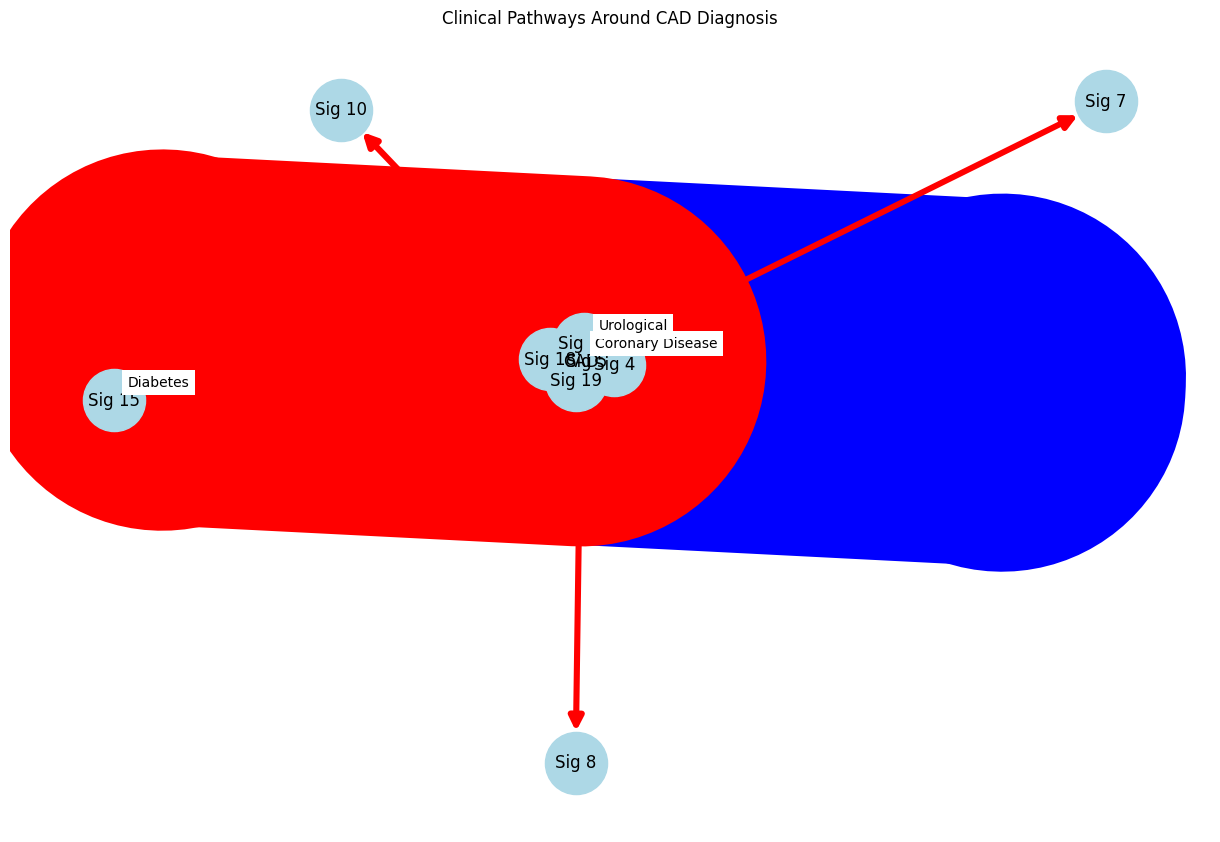

In [141]:

# Plot clinically relevant transitions
def plot_cad_pathways(pathways):
    """
    Create a clinically-oriented visualization of CAD transitions
    """
    import networkx as nx
    
    # Count common transitions
    pre_counts = Counter([tuple(p) for p in pathways['pre_cad']])
    post_counts = Counter([tuple(p) for p in pathways['post_cad']])
    
    # Create network
    G = nx.DiGraph()
    
    # Add pre-CAD transitions
    for path, count in pre_counts.most_common(5):
        G.add_edge(f'Sig {path[0]}', 'CAD', 
                  weight=count, color='blue')
    
    # Add post-CAD transitions
    for path, count in post_counts.most_common(5):
        G.add_edge('CAD', f'Sig {path[-1]}', 
                  weight=count, color='red')
    
    # Plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    
    # Draw network with clinical annotations
    nx.draw(G, pos, with_labels=True,
           node_color='lightblue',
           node_size=2000,
           arrowsize=20,
           edge_color=[G[u][v]['color'] for u,v in G.edges()],
           width=[G[u][v]['weight']/10 for u,v in G.edges()])
    
    # Add clinical annotations
    annotations = {
        'Sig 0': 'Arrhythmias\nHeart Failure',
        'Sig 11': 'Cerebrovascular',
        'Sig 13': 'Urological',
        'Sig 15': 'Diabetes',
        'CAD': 'Coronary Disease'
    }
    
    for node, (x, y) in pos.items():
        if node in annotations:
            plt.annotate(annotations[node],
                        (x, y),
                        xytext=(10, 10),
                        textcoords='offset points',
                        bbox=dict(facecolor='white', edgecolor='none'))
    
    plt.title('Clinical Pathways Around CAD Diagnosis')
    plt.show()

# Create visualization
plot_cad_pathways(pathways)

In [131]:
cancer_indices = [
    10,  # Colon cancer
    11,  # Malignant neoplasm of rectum
    13,  # Cancer of bronchus; lung
    14,  # Melanomas of skin
    16,  # Breast cancer [female]
    21,  # Cancer of prostate
    22,  # Malignant neoplasm of kidney
    23,  # Malignant neoplasm of bladder
    24,  # Malignant neoplasm, other
    25,  # Secondary malignant neoplasm
]

In [142]:

def analyze_specific_cancer_transitions(all_thetas, Y, cad_indices, cancer_indices):
    """
    Analyze transitions between CAD and specific cancer types
    """
    # Get high CAD loading mask
    high_sig5 = np.max(all_thetas[:, 5, :], axis=1) > 0.20
    
    # Calculate probabilities for each cancer type
    results = {}
    for i, cancer_idx in enumerate(cancer_indices):
        # Get cancer diagnosis
        cancer_cases = np.any(Y[:, cancer_idx, :].numpy(), axis=1)
        
        # Calculate conditional probabilities
        p_cancer_given_cad = np.mean(cancer_cases[high_sig5])
        p_cancer_no_cad = np.mean(cancer_cases[~high_sig5])
        risk_ratio = p_cancer_given_cad/p_cancer_no_cad if p_cancer_no_cad > 0 else float('inf')
        
        results[disease_names[cancer_idx]] = {
            'p_given_cad': p_cancer_given_cad,
            'p_no_cad': p_cancer_no_cad,
            'risk_ratio': risk_ratio,
            'n_cases_with_cad': np.sum(cancer_cases & high_sig5)
        }
    
    # Print results
    print("\nCancer Risk Analysis by Type:")
    print("----------------------------------------")
    for cancer_type, stats in results.items():
        print(f"\n{cancer_type}:")
        print(f"P(Cancer|High CAD): {stats['p_given_cad']:.3f}")
        print(f"P(Cancer|No CAD): {stats['p_no_cad']:.3f}")
        print(f"Risk Ratio: {stats['risk_ratio']:.2f}x")
        print(f"Cases with CAD: {stats['n_cases_with_cad']}")
    
    return results

# Run the analysis
cancer_transition_stats = analyze_specific_cancer_transitions(all_thetas, Y[:400000,], cad_indices, cancer_indices)


Cancer Risk Analysis by Type:
----------------------------------------

Colon cancer:
P(Cancer|High CAD): 0.017
P(Cancer|No CAD): 0.017
Risk Ratio: 0.99x
Cases with CAD: 914

Malignant neoplasm of rectum, rectosigmoid junction, and anus:
P(Cancer|High CAD): 0.010
P(Cancer|No CAD): 0.011
Risk Ratio: 0.96x
Cases with CAD: 559

Cancer of bronchus; lung:
P(Cancer|High CAD): 0.015
P(Cancer|No CAD): 0.014
Risk Ratio: 1.02x
Cases with CAD: 809

Melanomas of skin:
P(Cancer|High CAD): 0.014
P(Cancer|No CAD): 0.014
Risk Ratio: 1.01x
Cases with CAD: 764

Breast cancer [female]:
P(Cancer|High CAD): 0.008
P(Cancer|No CAD): 0.009
Risk Ratio: 0.91x
Cases with CAD: 446

Cancer of prostate:
P(Cancer|High CAD): 0.036
P(Cancer|No CAD): 0.037
Risk Ratio: 0.97x
Cases with CAD: 1964

Malignant neoplasm of kidney, except pelvis:
P(Cancer|High CAD): 0.006
P(Cancer|No CAD): 0.006
Risk Ratio: 1.00x
Cases with CAD: 315

Malignant neoplasm of bladder:
P(Cancer|High CAD): 0.012
P(Cancer|No CAD): 0.011
Risk Ratio:

In [143]:
def analyze_cad_cancer_signature_transitions(all_thetas, threshold=0.20):
    """
    Analyze transitions between CAD (Sig 5) and Cancer (Sig 6) signatures
    """
    # Define high loading in each signature
    high_sig5 = np.max(all_thetas[:, 5, :], axis=1) > threshold  # CAD
    high_sig6 = np.max(all_thetas[:, 6, :], axis=1) > threshold  # Cancer
    
    # Calculate conditional probabilities
    p_cancer_given_cad = np.mean(high_sig6[high_sig5])
    p_cancer_no_cad = np.mean(high_sig6[~high_sig5])
    
    # Get temporal ordering for those with both
    both_conditions = high_sig5 & high_sig6
    sig5_first_timepoint = np.argmax(all_thetas[:, 5, :] > threshold, axis=1)
    sig6_first_timepoint = np.argmax(all_thetas[:, 6, :] > threshold, axis=1)
    
    cad_first = np.sum((sig5_first_timepoint < sig6_first_timepoint) & both_conditions)
    cancer_first = np.sum((sig6_first_timepoint < sig5_first_timepoint) & both_conditions)
    
    print("\nCAD-Cancer Signature Transition Analysis:")
    print("----------------------------------------")
    print(f"P(Cancer Sig|Ever had CAD Sig): {p_cancer_given_cad:.3f}")
    print(f"P(Cancer Sig|Never had CAD Sig): {p_cancer_no_cad:.3f}")
    print(f"Risk Ratio: {p_cancer_given_cad/p_cancer_no_cad:.2f}x")
    
    print(f"\nTotal with both signatures: {np.sum(both_conditions)}")
    print(f"CAD signature first: {cad_first} cases")
    print(f"Cancer signature first: {cancer_first} cases")
    
    return {
        'p_cancer_given_cad': p_cancer_given_cad,
        'p_cancer_no_cad': p_cancer_no_cad,
        'risk_ratio': p_cancer_given_cad/p_cancer_no_cad,
        'both_count': np.sum(both_conditions),
        'cad_first': cad_first,
        'cancer_first': cancer_first
    }

# Run the analysis
signature_transitions = analyze_cad_cancer_signature_transitions(all_thetas)


CAD-Cancer Signature Transition Analysis:
----------------------------------------
P(Cancer Sig|Ever had CAD Sig): 0.097
P(Cancer Sig|Never had CAD Sig): 0.124
Risk Ratio: 0.78x

Total with both signatures: 5334
CAD signature first: 2544 cases
Cancer signature first: 2698 cases


In [53]:
def analyze_cad_cancer_signature_transitions(all_thetas, threshold=0.20):
    """
    Analyze transitions between CAD (Sig 5) and Cancer (Sig 6) signatures,
    with size-corrected probabilities
    """
    # Define high loading in each signature
    high_sig5 = np.max(all_thetas[:, 5, :], axis=1) > threshold  # CAD
    high_sig6 = np.max(all_thetas[:, 6, :], axis=1) > threshold  # Cancer
    
    # Get group sizes
    n_cad = np.sum(high_sig5)
    n_no_cad = np.sum(~high_sig5)
    
    # Calculate size-corrected probabilities
    p_cancer_given_cad = np.sum(high_sig6[high_sig5]) / n_cad if n_cad > 0 else 0
    p_cancer_no_cad = np.sum(high_sig6[~high_sig5]) / n_no_cad if n_no_cad > 0 else 0
    
    # Get temporal ordering for those with both
    both_conditions = high_sig5 & high_sig6
    sig5_first_timepoint = np.argmax(all_thetas[:, 5, :] > threshold, axis=1)
    sig6_first_timepoint = np.argmax(all_thetas[:, 6, :] > threshold, axis=1)
    
    cad_first = np.sum((sig5_first_timepoint < sig6_first_timepoint) & both_conditions)
    cancer_first = np.sum((sig6_first_timepoint < sig5_first_timepoint) & both_conditions)
    
    print("\nCAD-Cancer Signature Transition Analysis:")
    print("----------------------------------------")
    print(f"Total patients with CAD signature: {n_cad}")
    print(f"Total patients without CAD signature: {n_no_cad}")
    print(f"\nP(Cancer Sig|Ever had CAD Sig): {p_cancer_given_cad:.3f}")
    print(f"P(Cancer Sig|Never had CAD Sig): {p_cancer_no_cad:.3f}")
    print(f"Risk Ratio: {p_cancer_given_cad/p_cancer_no_cad:.2f}x")
    
    print(f"\nTotal with both signatures: {np.sum(both_conditions)}")
    print(f"CAD signature first: {cad_first} cases ({cad_first/np.sum(both_conditions):.1%})")
    print(f"Cancer signature first: {cancer_first} cases ({cancer_first/np.sum(both_conditions):.1%})")
    
    return {
        'n_cad': n_cad,
        'n_no_cad': n_no_cad,
        'p_cancer_given_cad': p_cancer_given_cad,
        'p_cancer_no_cad': p_cancer_no_cad,
        'risk_ratio': p_cancer_given_cad/p_cancer_no_cad,
        'both_count': np.sum(both_conditions),
        'cad_first': cad_first,
        'cancer_first': cancer_first
    }

# Run the analysis
signature_transitions = analyze_cad_cancer_signature_transitions(all_thetas)


CAD-Cancer Signature Transition Analysis:
----------------------------------------
Total patients with CAD signature: 55141
Total patients without CAD signature: 344859

P(Cancer Sig|Ever had CAD Sig): 0.097
P(Cancer Sig|Never had CAD Sig): 0.124
Risk Ratio: 0.78x

Total with both signatures: 5334
CAD signature first: 2544 cases (47.7%)
Cancer signature first: 2698 cases (50.6%)


In [61]:
def analyze_cad_cancer_transitions_by_age(all_thetas, window=5, threshold=0.05):
    """
    Analyze probability of developing cancer signature within X years,
    comparing CAD patients to matched controls at same age points
    """
    # Get first timepoint of high CAD loading for each person
    high_sig5 = all_thetas[:, 5, :] > threshold
    cad_onset = np.argmax(high_sig5, axis=1)
    
    # Create age groups (in timepoints, 0-50 represents ages 30-80)
    tp_bins = [0, 15, 25, 35, 45]  # corresponds to ages 30,45,55,65,75
    age_labels = ['30-45', '45-55', '55-65', '65-75', '75+']
    
    results = {}
    for i in range(len(tp_bins)-1):
        start_tp = tp_bins[i]
        end_tp = tp_bins[i+1]
        
        # Get CAD patients who developed it in this window
        window_mask = (cad_onset >= start_tp) & (cad_onset < end_tp)
        cad_pts = np.where(window_mask)[0]
        
        cancer_after_cad = 0
        valid_cad = 0
        
        # For each CAD patient, look forward window years
        for pt in cad_pts:
            onset = cad_onset[pt]
            if onset + window < all_thetas.shape[2]:
                valid_cad += 1
                if np.any(all_thetas[pt, 6, onset:onset+window] > threshold):
                    cancer_after_cad += 1
        
        # For controls: look at same timepoints in non-CAD patients
        control_pts = np.where(~np.any(high_sig5, axis=1))[0]
        cancer_in_controls = 0
        valid_controls = 0
        
        # Look at same timepoints for controls
        for pt in control_pts:
            if start_tp + window < all_thetas.shape[2]:
                valid_controls += 1
                if np.any(all_thetas[pt, 6, start_tp:start_tp+window] > threshold):
                    cancer_in_controls += 1
        
        # Calculate probabilities
        p_cad = cancer_after_cad/valid_cad if valid_cad > 0 else 0
        p_control = cancer_in_controls/valid_controls if valid_controls > 0 else 0
        
        results[age_labels[i]] = {
            'n_cad': valid_cad,
            'n_controls': valid_controls,
            'p_cancer_after_cad': p_cad,
            'p_cancer_controls': p_control,
            'risk_ratio': p_cad/p_control if p_control > 0 else float('inf')
        }
        
        print(f"\nAge group {age_labels[i]} (timepoints {start_tp}-{end_tp}):")
        print(f"CAD patients with follow-up: {valid_cad}")
        print(f"Control patients: {valid_controls}")
        print(f"P(Cancer within {window} years | CAD): {p_cad:.3f}")
        print(f"P(Cancer within {window} years | No CAD): {p_control:.3f}")
        print(f"Risk Ratio: {p_cad/p_control:.2f}x")
    
    return results

# Run the analysis
results = analyze_cad_cancer_transitions_by_age(all_thetas, window=5)


Age group 30-45 (timepoints 0-15):
CAD patients with follow-up: 300970
Control patients: 110106
P(Cancer within 5 years | CAD): 0.363
P(Cancer within 5 years | No CAD): 0.386
Risk Ratio: 0.94x

Age group 45-55 (timepoints 15-25):
CAD patients with follow-up: 34275
Control patients: 110106
P(Cancer within 5 years | CAD): 0.372
P(Cancer within 5 years | No CAD): 0.381
Risk Ratio: 0.97x

Age group 55-65 (timepoints 25-35):
CAD patients with follow-up: 29232
Control patients: 110106
P(Cancer within 5 years | CAD): 0.388
P(Cancer within 5 years | No CAD): 0.379
Risk Ratio: 1.02x

Age group 65-75 (timepoints 35-45):
CAD patients with follow-up: 22636
Control patients: 110106
P(Cancer within 5 years | CAD): 0.388
P(Cancer within 5 years | No CAD): 0.388
Risk Ratio: 1.00x


In [144]:
def analyze_cad_cancer_diagnosis_transitions(Y, cad_indices, cancer_indices, window=5):
    """
    Analyze probability of developing cancer within X years after CAD diagnosis,
    using actual diagnosis data from Y
    """
    # Get first CAD diagnosis for each person
    cad_onset = np.argmax(np.any(Y[:, cad_indices, :].numpy(), axis=1), axis=1)
    
    # Create age groups (timepoints 0-50 represent ages 30-80)
    tp_bins = [0, 15, 25, 35, 45]  # ages 30,45,55,65,75
    age_labels = ['30-45', '45-55', '55-65', '65-75', '75+']
    
    results = {}
    for i in range(len(tp_bins)-1):
        start_tp = tp_bins[i]
        end_tp = tp_bins[i+1]
        
        # Get patients diagnosed with CAD in this window
        window_mask = (cad_onset >= start_tp) & (cad_onset < end_tp)
        cad_pts = np.where(window_mask)[0]
        
        cancer_after_cad = 0
        valid_cad = 0
        
        # For each CAD patient, look forward window years
        for pt in cad_pts:
            onset = cad_onset[pt]
            if onset + window < Y.shape[2]:
                valid_cad += 1
                # Check if they develop any cancer
                if np.any(Y[pt, cancer_indices, onset:onset+window].numpy()):
                    cancer_after_cad += 1
        
        # For controls: look at same timepoints in non-CAD patients
        control_mask = ~np.any(np.any(Y[:, cad_indices, :].numpy(), axis=1), axis=1)
        control_pts = np.where(control_mask)[0]
        cancer_in_controls = 0
        valid_controls = 0
        
        # Look at same timepoints for controls
        for pt in control_pts:
            if start_tp + window < Y.shape[2]:
                valid_controls += 1
                if np.any(Y[pt, cancer_indices, start_tp:start_tp+window].numpy()):
                    cancer_in_controls += 1
        
        # Calculate probabilities
        p_cad = cancer_after_cad/valid_cad if valid_cad > 0 else 0
        p_control = cancer_in_controls/valid_controls if valid_controls > 0 else 0
        
        results[age_labels[i]] = {
            'n_cad': valid_cad,
            'n_controls': valid_controls,
            'p_cancer_after_cad': p_cad,
            'p_cancer_controls': p_control,
            'risk_ratio': p_cad/p_control if p_control > 0 else float('inf')
        }
        
        print(f"\nAge group {age_labels[i]} (timepoints {start_tp}-{end_tp}):")
        print(f"CAD patients with follow-up: {valid_cad}")
        print(f"Control patients: {valid_controls}")
        print(f"P(Cancer within {window} years | CAD): {p_cad:.3f}")
        print(f"P(Cancer within {window} years | No CAD): {p_control:.3f}")
        print(f"Risk Ratio: {p_cad/p_control:.2f}x")
        
        # Add specific cancer type breakdown for CAD patients
        if valid_cad > 0:
            print("\nCancer type breakdown after CAD:")
            for j, cancer_idx in enumerate(cancer_indices):
                cancer_count = sum(np.any(Y[pt, cancer_idx, onset:onset+window].numpy()) 
                                 for pt in cad_pts if onset + window < Y.shape[2])
                print(f"Cancer type {j}: {cancer_count} cases ({cancer_count/valid_cad:.3f})")
    
    return results

# Run the analysis
results = analyze_cad_cancer_diagnosis_transitions(Y, cad_indices, cancer_indices, window=5)


Age group 30-45 (timepoints 0-15):
CAD patients with follow-up: 363527
Control patients: 362832
P(Cancer within 5 years | CAD): 0.000
P(Cancer within 5 years | No CAD): 0.000
Risk Ratio: 1.08x

Cancer type breakdown after CAD:
Cancer type 0: 3 cases (0.000)
Cancer type 1: 1 cases (0.000)
Cancer type 2: 0 cases (0.000)
Cancer type 3: 15 cases (0.000)
Cancer type 4: 4 cases (0.000)
Cancer type 5: 0 cases (0.000)
Cancer type 6: 0 cases (0.000)
Cancer type 7: 1 cases (0.000)
Cancer type 8: 1 cases (0.000)
Cancer type 9: 1 cases (0.000)

Age group 45-55 (timepoints 15-25):
CAD patients with follow-up: 5503
Control patients: 362832
P(Cancer within 5 years | CAD): 0.011
P(Cancer within 5 years | No CAD): 0.003
Risk Ratio: 4.28x

Cancer type breakdown after CAD:
Cancer type 0: 3 cases (0.001)
Cancer type 1: 4 cases (0.001)
Cancer type 2: 3 cases (0.001)
Cancer type 3: 5 cases (0.001)
Cancer type 4: 3 cases (0.001)
Cancer type 5: 3 cases (0.001)
Cancer type 6: 4 cases (0.001)
Cancer type 7: 7 

In [66]:
cancer_names = [disease_names[i] for i in cancer_indices]

In [67]:
cancer_names

[np.str_('Colon cancer'),
 np.str_('Malignant neoplasm of rectum, rectosigmoid junction, and anus'),
 np.str_('Cancer of bronchus; lung'),
 np.str_('Melanomas of skin'),
 np.str_('Breast cancer [female]'),
 np.str_('Cancer of prostate'),
 np.str_('Malignant neoplasm of kidney, except pelvis'),
 np.str_('Malignant neoplasm of bladder'),
 np.str_('Malignant neoplasm, other'),
 np.str_('Secondary malignant neoplasm')]

In [145]:
def analyze_cad_cancer_signature_transitions(all_thetas, window=5, threshold=0.20):
    """
    Analyze transitions from CAD to cancer signatures using same approach as diagnosis analysis
    """
    # Get first timepoint of high CAD loading (like first diagnosis)
    high_sig5 = all_thetas[:, 5, :] > threshold
    cad_onset = np.argmax(high_sig5, axis=1)
    
    # Create age groups
    tp_bins = [0, 15, 25, 35, 45]  # ages 30,45,55,65,75
    age_labels = ['30-45', '45-55', '55-65', '65-75', '75+']
    
    results = {}
    for i in range(len(tp_bins)-1):
        start_tp = tp_bins[i]
        end_tp = tp_bins[i+1]
        
        # Get patients who first showed CAD signature in this window
        window_mask = (cad_onset >= start_tp) & (cad_onset < end_tp)
        cad_pts = np.where(window_mask)[0]
        
        cancer_after_cad = 0
        valid_cad = 0
        
        # For each CAD patient, look forward window years
        for pt in cad_pts:
            onset = cad_onset[pt]
            if onset + window < all_thetas.shape[2]:
                valid_cad += 1
                # Check if they develop cancer signature
                if np.any(all_thetas[pt, 6, onset:onset+window] > threshold):
                    cancer_after_cad += 1
        
        # For controls: look at patients who never developed CAD signature in this window
        control_mask = ~np.any(high_sig5[:, start_tp:end_tp], axis=1)
        control_pts = np.where(control_mask)[0]
        cancer_in_controls = 0
        valid_controls = 0
        
        # Look at same timepoints for controls
        for pt in control_pts:
            if start_tp + window < all_thetas.shape[2]:
                valid_controls += 1
                if np.any(all_thetas[pt, 6, start_tp:start_tp+window] > threshold):
                    cancer_in_controls += 1
        
        # Calculate probabilities
        p_cad = cancer_after_cad/valid_cad if valid_cad > 0 else 0
        p_control = cancer_in_controls/valid_controls if valid_controls > 0 else 0
        
        results[age_labels[i]] = {
            'n_cad': valid_cad,
            'n_controls': valid_controls,
            'p_cancer_after_cad': p_cad,
            'p_cancer_controls': p_control,
            'risk_ratio': p_cad/p_control if p_control > 0 else float('inf')
        }
        
        print(f"\nAge group {age_labels[i]} (timepoints {start_tp}-{end_tp}):")
        print(f"CAD patients with follow-up: {valid_cad}")
        print(f"Control patients: {valid_controls}")
        print(f"P(Cancer within {window} years | CAD): {p_cad:.3f}")
        print(f"P(Cancer within {window} years | No CAD): {p_control:.3f}")
        print(f"Risk Ratio: {p_cad/p_control:.2f}x")
        
        # Add signature strength analysis
        if valid_cad > 0:
            print("\nCancer signature strength after CAD:")
            mean_sig6_cad = np.mean([
                np.max(all_thetas[pt, 6, onset:onset+window])
                for pt in cad_pts if onset + window < all_thetas.shape[2]
            ])
            mean_sig6_control = np.mean([
                np.max(all_thetas[pt, 6, start_tp:start_tp+window])
                for pt in control_pts if start_tp + window < all_thetas.shape[2]
            ])
            print(f"Mean max cancer sig (CAD): {mean_sig6_cad:.3f}")
            print(f"Mean max cancer sig (Control): {mean_sig6_control:.3f}")
    
    return results

# Run the analysis
results = analyze_cad_cancer_signature_transitions(all_thetas)


Age group 30-45 (timepoints 0-15):
CAD patients with follow-up: 371707
Control patients: 373152
P(Cancer within 5 years | CAD): 0.036
P(Cancer within 5 years | No CAD): 0.037
Risk Ratio: 0.95x

Cancer signature strength after CAD:
Mean max cancer sig (CAD): 0.056
Mean max cancer sig (Control): 0.057

Age group 45-55 (timepoints 15-25):
CAD patients with follow-up: 7833
Control patients: 378346
P(Cancer within 5 years | CAD): 0.020
P(Cancer within 5 years | No CAD): 0.034
Risk Ratio: 0.59x

Cancer signature strength after CAD:
Mean max cancer sig (CAD): 0.045
Mean max cancer sig (Control): 0.056

Age group 55-65 (timepoints 25-35):
CAD patients with follow-up: 7730
Control patients: 379159
P(Cancer within 5 years | CAD): 0.017
P(Cancer within 5 years | No CAD): 0.035
Risk Ratio: 0.49x

Cancer signature strength after CAD:
Mean max cancer sig (CAD): 0.044
Mean max cancer sig (Control): 0.056

Age group 65-75 (timepoints 35-45):
CAD patients with follow-up: 7268
Control patients: 379804


In [69]:
old=torch.load('/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028/model.pt')

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_64779/777434438.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  old=torch.load('/Users/sarahurbut/Dropbox (Per

In [71]:
old['initial_phi']
old['model_state_dict']['phi']-old['initial_phi']

tensor([[[ 7.8030e-03,  5.5885e-03,  2.5902e-03,  ..., -1.9884e-03,
           1.1759e-03,  4.4670e-03],
         [-3.6249e-03, -2.1124e-03,  9.9754e-04,  ..., -2.3060e-03,
          -1.7138e-03,  1.0853e-03],
         [-1.5255e-02, -6.7158e-03, -1.3485e-03,  ..., -9.0027e-04,
          -2.6722e-03, -3.7794e-03],
         ...,
         [ 9.4414e-05, -3.7098e-04, -1.9789e-03,  ...,  2.7370e-04,
          -2.3136e-03, -4.2868e-03],
         [ 5.4703e-03, -2.0180e-03, -2.3155e-03,  ...,  2.0695e-04,
           5.6553e-04,  7.4387e-05],
         [-1.0601e-02, -4.0989e-03,  5.6934e-04,  ..., -4.8447e-04,
           9.3269e-04,  2.5759e-03]],

        [[-1.4896e-03, -3.2425e-04,  2.1734e-03,  ...,  1.9932e-03,
          -1.0099e-03,  3.0994e-04],
         [ 6.9256e-03,  2.7370e-03, -5.3120e-04,  ...,  1.3323e-03,
           1.5154e-03, -2.6741e-03],
         [ 2.6436e-03,  1.6594e-04, -6.4468e-04,  ..., -1.5068e-04,
          -2.1286e-03, -3.2740e-03],
         ...,
         [-5.5695e-04,  1

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def find_signature_transitions(lambdas, Y, patient_ids, conditions_dict):
    """
    Find patients with interesting transitions between signatures
    """
    interesting_cases = []
    
    # Get indices for conditions we care about
    cv_indices = [i for i, cond in enumerate(all_conditions) 
                 if cond in conditions_dict['Cardiovascular (5)']]
    cancer_indices = [i for i, cond in enumerate(all_conditions) 
                     if cond in conditions_dict['Cancer (6)']]
    metabolic_indices = [i for i, cond in enumerate(all_conditions) 
                        if cond in conditions_dict['Metabolic (15)']]
    
    for pid in range(len(lambdas)):
        # Get patient's lambda trajectories for signatures 5, 6, and 15
        sig_trajectories = lambdas[pid, [5,6,15], :]  # [3, 52]
        
        # Get patient's diagnoses
        diagnoses = Y[pid]
        
        # Check if patient has conditions from multiple signatures
        has_cv = np.any(diagnoses[cv_indices])
        has_cancer = np.any(diagnoses[cancer_indices])
        has_metabolic = np.any(diagnoses[metabolic_indices])
        
        if sum([has_cv, has_cancer, has_metabolic]) >= 2:
            # Calculate signature strength changes
            sig_changes = np.ptp(sig_trajectories, axis=1)  # peak-to-peak
            
            if np.max(sig_changes) > np.percentile(sig_changes, 80):
                interesting_cases.append({
                    'pid': patient_ids[pid],
                    'trajectories': sig_trajectories,
                    'diagnoses': {
                        'cv': diagnoses[cv_indices],
                        'cancer': diagnoses[cancer_indices],
                        'metabolic': diagnoses[metabolic_indices]
                    }
                })
    
    return interesting_cases

def plot_signature_transition(case, timepoints=52):
    """
    Plot signature evolution and diagnoses
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])
    
    # Plot signature trajectories
    t = np.arange(timepoints)
    signatures = ['Cardiovascular', 'Cancer', 'Metabolic']
    colors = ['red', 'blue', 'green']
    
    for i, (sig, color) in enumerate(zip(signatures, colors)):
        ax1.plot(t, case['trajectories'][i], label=sig, color=color)
    
    ax1.set_ylabel('Signature Strength')
    ax1.legend()
    
    # Plot diagnoses
    for sig_type, events in case['diagnoses'].items():
        if np.any(events):
            event_times = np.where(events)[0]
            ax2.scatter(event_times, np.zeros_like(event_times), 
                       label=sig_type, alpha=0.7)
    
    ax2.set_ylabel('Diagnoses')
    ax2.legend()
    
    plt.tight_layout()
    return fig

# Find interesting cases
interesting_cases = find_signature_transitions(all_lambdas, Y, processed_ids, SIGNATURE_CONDITIONS)

# Plot top N most interesting cases
N = 5
for case in interesting_cases[:N]:
    fig = plot_signature_transition(case)
    plt.show()

NameError: name 'all_conditions' is not defined

In [20]:
SIGNATURE_CONDITIONS  = {
    'Cardiovascular (5)': [
        'Coronary atherosclerosis',
        'Other chronic ischemic heart disease, unspecified',
        'Myocardial infarction',
        'Hypercholesterolemia',
        'Angina pectoris'
    ],
    
    'Cancer (6)': [
        'Secondary malignancy of bone',
        'Secondary malignant neoplasm of digestive systems',
        'Cancer of bronchus; lung',
        'Secondary malignancy of lymph nodes',
        'Secondary malignant neoplasm'
    ],
    
    'Metabolic (15)': [
        'Type 2 diabetes',
        'Hypoglycemia',
        'Type 2 diabetes with ophthalmic manifestations',
        'Diabetic retinopathy'
    ]
}


In [21]:
def find_transition_patients(lambdas, Y, disease_names):
    """
    Find patients who show clear transitions between signatures
    and have corresponding diseases
    """
    # Convert lambdas to torch tensor if it's not already
    if isinstance(lambdas, np.ndarray):
        lambdas = torch.from_numpy(lambdas).float()
    
  
    if isinstance(Y, np.ndarray):
        Y = torch.from_numpy(Y).float()

    
    # Convert signature conditions to numpy strings
    SIGNATURE_CONDITIONS_NP = {
        'Cardiovascular (5)': [np.str_(x) for x in SIGNATURE_CONDITIONS['Cardiovascular (5)']],
        'Cancer (6)': [np.str_(x) for x in SIGNATURE_CONDITIONS['Cancer (6)']],
        'Metabolic (15)': [np.str_(x) for x in SIGNATURE_CONDITIONS['Metabolic (15)']]
    }
    
    # Print conditions we're looking for
    print("\nLooking for conditions:")
    print("CV conditions:", SIGNATURE_CONDITIONS_NP['Cardiovascular (5)'])
    print("Cancer conditions:", SIGNATURE_CONDITIONS_NP['Cancer (6)'])
    print("Metabolic conditions:", SIGNATURE_CONDITIONS_NP['Metabolic (15)'])
    
    # Convert disease_names to list if it's not already
    if not isinstance(disease_names, (list, np.ndarray)):
        disease_names = list(disease_names)
    
    print("\nFirst few disease names:")
    print(disease_names[:10] if len(disease_names) > 10 else disease_names)
    
    interesting_cases = []
    
    # Get indices with debug printing
    cv_indices = []
    cancer_indices = []
    metabolic_indices = []
    
    for i, cond in enumerate(disease_names):
        if any(str(cond) == str(x) for x in SIGNATURE_CONDITIONS_NP['Cardiovascular (5)']):
            cv_indices.append(i)
            print(f"Found CV condition {cond} at index {i}")
        if any(str(cond) == str(x) for x in SIGNATURE_CONDITIONS_NP['Cancer (6)']):
            cancer_indices.append(i)
            print(f"Found Cancer condition {cond} at index {i}")
        if any(str(cond) == str(x) for x in SIGNATURE_CONDITIONS_NP['Metabolic (15)']):
            metabolic_indices.append(i)
            print(f"Found Metabolic condition {cond} at index {i}")
    
    cv_indices = torch.tensor(cv_indices, dtype=torch.long)
    cancer_indices = torch.tensor(cancer_indices, dtype=torch.long)
    metabolic_indices = torch.tensor(metabolic_indices, dtype=torch.long)
    
    # Print the indices we found for debugging
    print("CV indices:", cv_indices)
    print("Cancer indices:", cancer_indices)
    print("Metabolic indices:", metabolic_indices)
    
    count_cv = 0
    count_cancer = 0
    count_metabolic = 0
    count_multiple = 0
    
    softmax = torch.nn.Softmax(dim=0)
    
    for pid in range(len(Y)):
        # Get trajectories and apply softmax
        raw_trajectories = lambdas[pid, [5,6,15], :]  # Shape: [3, 52]
        # Convert to torch tensor if needed
        if not isinstance(raw_trajectories, torch.Tensor):
            raw_trajectories = torch.from_numpy(raw_trajectories).float()
        trajectories = torch.stack([softmax(raw_trajectories[:, t]) for t in range(raw_trajectories.shape[1])], dim=1)
        
        # Check if they have conditions from multiple signatures
        has_cv = torch.any(Y[pid, cv_indices]).item()
        has_cancer = torch.any(Y[pid, cancer_indices]).item()
        has_metabolic = torch.any(Y[pid, metabolic_indices]).item()
        
        # Count conditions for debugging
        if has_cv: count_cv += 1
        if has_cancer: count_cancer += 1
        if has_metabolic: count_metabolic += 1
        if sum([has_cv, has_cancer, has_metabolic]) >= 2:
            count_multiple += 1
        
        if sum([has_cv, has_cancer, has_metabolic]) >= 1:  # At least one condition
            # Check for significant changes in signature strengths
            sig_changes = (trajectories.max(dim=1)[0] - trajectories.min(dim=1)[0])
            if torch.max(sig_changes) > torch.quantile(sig_changes, 0.75):
                interesting_cases.append({
                    'pid': pid,
                    'trajectories': trajectories.detach().cpu().numpy(),
                    'conditions': {
                        'cv': has_cv,
                        'cancer': has_cancer,
                        'metabolic': has_metabolic
                    },
                    'sig_changes': sig_changes.detach().cpu().numpy()
                })
    
    print(f"\nDiagnostic counts:")
    print(f"Patients with CV conditions: {count_cv}")
    print(f"Patients with Cancer conditions: {count_cancer}")
    print(f"Patients with Metabolic conditions: {count_metabolic}")
    print(f"Patients with multiple conditions: {count_multiple}")
    
    return interesting_cases

In [22]:
Y.shape


torch.Size([407878, 348, 52])


Looking for conditions:
CV conditions: [np.str_('Coronary atherosclerosis'), np.str_('Other chronic ischemic heart disease, unspecified'), np.str_('Myocardial infarction'), np.str_('Hypercholesterolemia'), np.str_('Angina pectoris')]
Cancer conditions: [np.str_('Secondary malignancy of bone'), np.str_('Secondary malignant neoplasm of digestive systems'), np.str_('Cancer of bronchus; lung'), np.str_('Secondary malignancy of lymph nodes'), np.str_('Secondary malignant neoplasm')]
Metabolic conditions: [np.str_('Type 2 diabetes'), np.str_('Hypoglycemia'), np.str_('Type 2 diabetes with ophthalmic manifestations'), np.str_('Diabetic retinopathy')]

First few disease names:
[np.str_('Bacterial enteritis'), np.str_('Viral Enteritis'), np.str_('Gram negative septicemia'), np.str_('Bacterial infection NOS'), np.str_('Staphylococcus infections'), np.str_('Streptococcus infection'), np.str_('E. coli'), np.str_('Viral warts & HPV'), np.str_('Viral infection'), np.str_('Candidiasis')]
Found Cancer

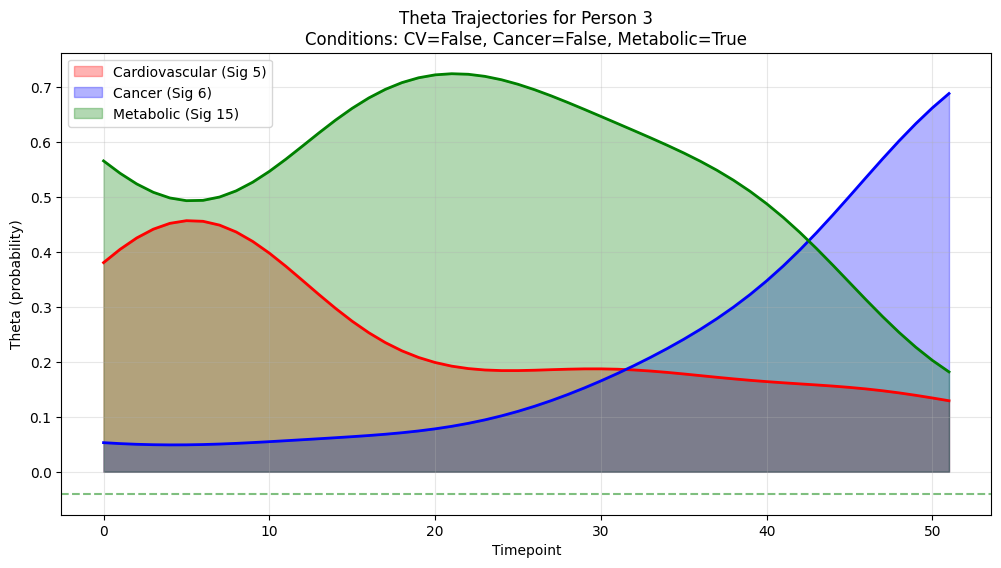

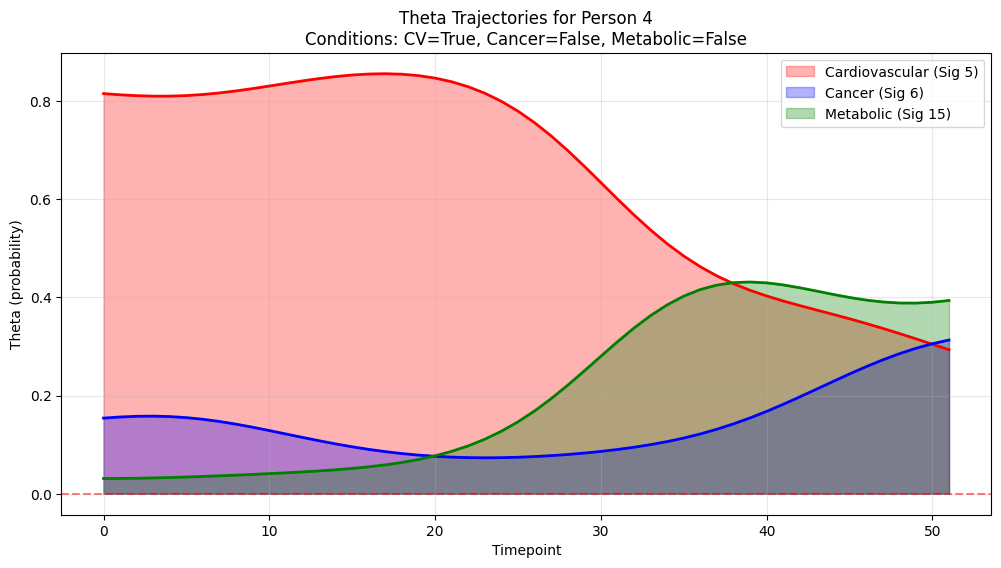

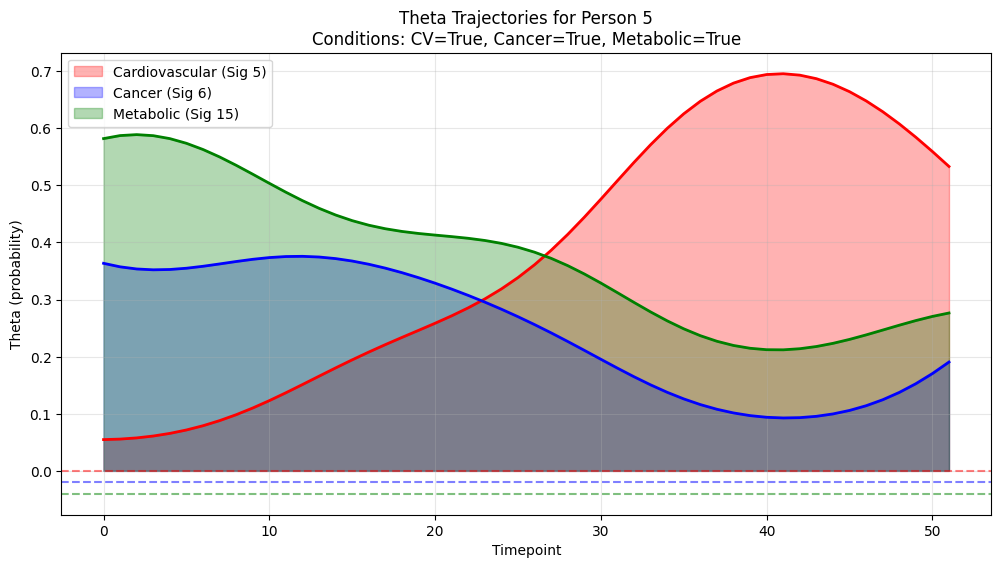

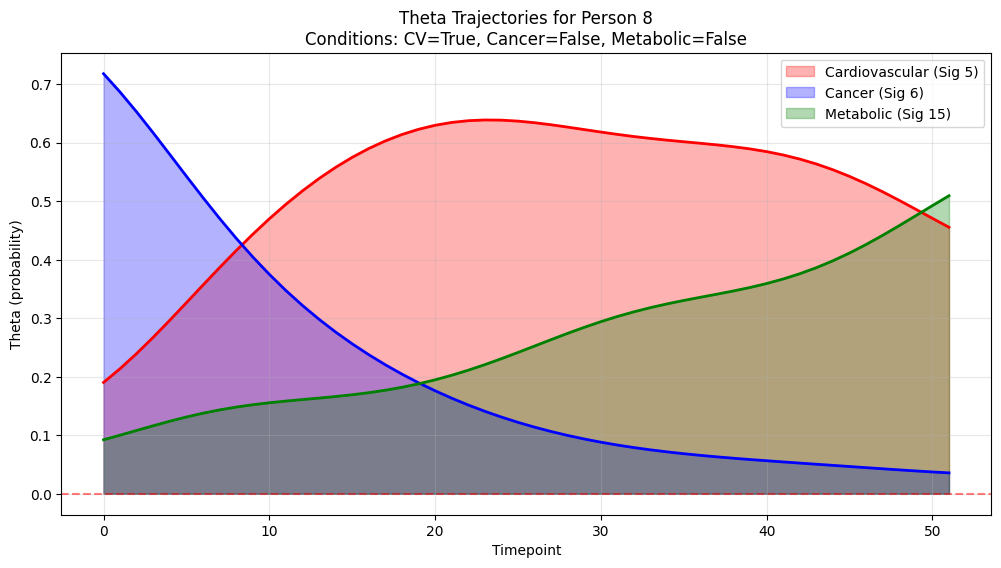

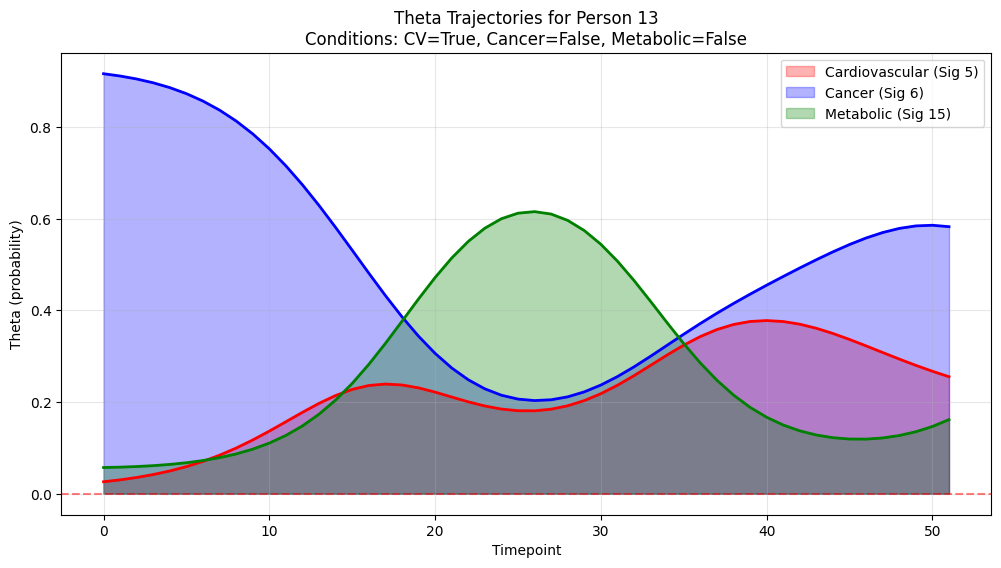

In [23]:
cases = find_transition_patients(all_lambdas, Y[1:400000,], disease_names)
print(f"\nFound {len(cases)} interesting cases")

# 4. Plot the results
if len(cases) > 0:
    # Plot top 5 most interesting cases
    for case in cases[:5]:
        plot_theta_trajectories(case)
        plt.show()

In [15]:
saved_data = torch.load('/Users/sarahurbut/Dropbox (Personal)/model_with_bigasslambda.pt')

# 2. Extract the necessary components
#Y = saved_data['Y']
disease_names = saved_data['disease_names']
lambda_values = saved_data['model_state_dict']['lambda_']


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_56873/514362325.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_data = torch.load('/Users/sarahurbut/Dro

Starting analysis...
Found 5 CV conditions
Found 6 cancer conditions
Found 4 metabolic conditions
Processed 0 patients...
Processed 1000 patients...
Processed 2000 patients...
Processed 3000 patients...
Processed 4000 patients...
Processed 5000 patients...
Processed 6000 patients...
Processed 7000 patients...
Processed 8000 patients...
Processed 9000 patients...
Processed 10000 patients...
Processed 11000 patients...
Processed 12000 patients...
Processed 13000 patients...
Processed 14000 patients...
Processed 15000 patients...
Processed 16000 patients...
Processed 17000 patients...
Processed 18000 patients...
Processed 19000 patients...
Processed 20000 patients...
Processed 21000 patients...
Processed 22000 patients...
Processed 23000 patients...
Processed 24000 patients...
Processed 25000 patients...
Processed 26000 patients...
Processed 27000 patients...
Processed 28000 patients...
Processed 29000 patients...
Processed 30000 patients...
Processed 31000 patients...
Processed 32000 pat

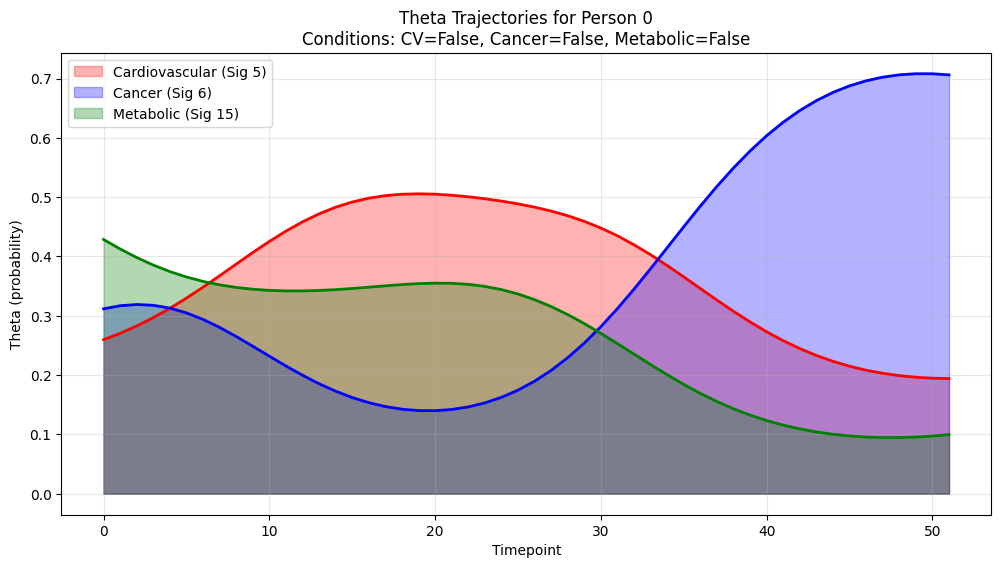

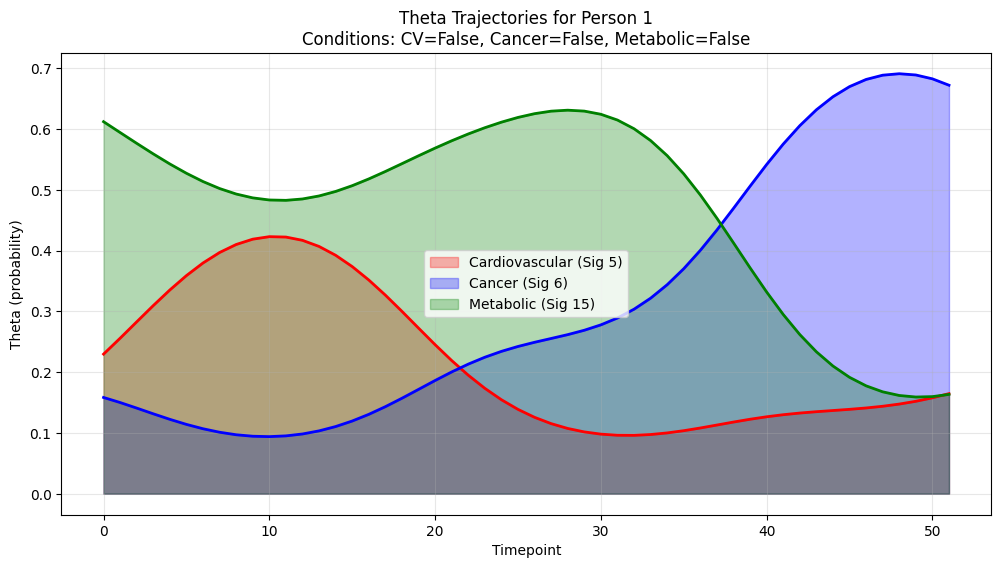

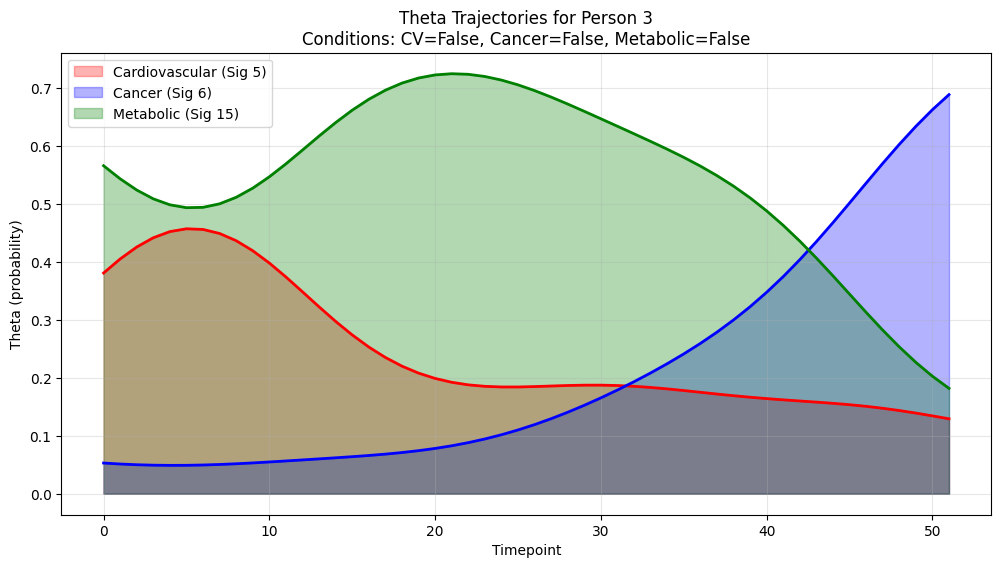

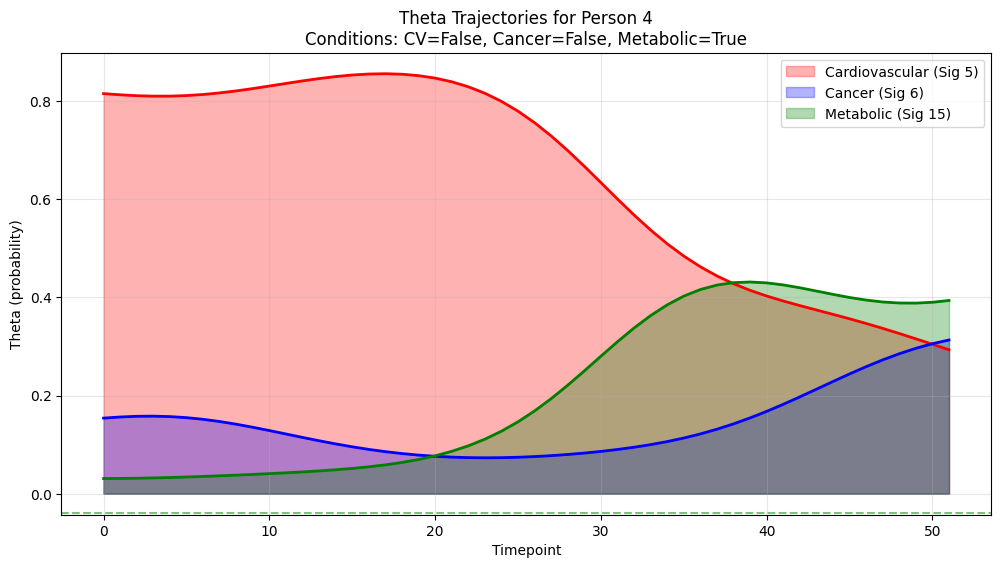

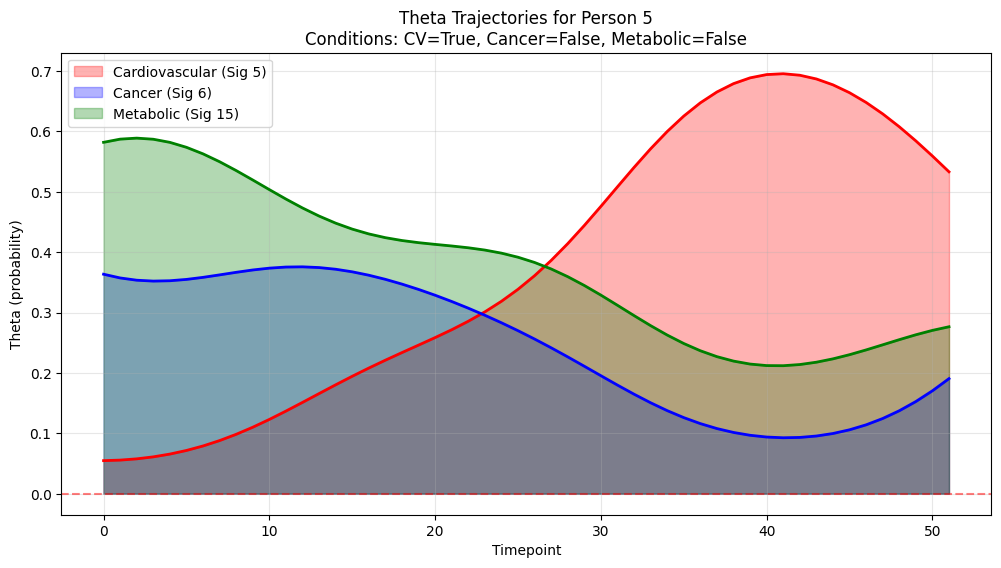

In [35]:

# 1. Make sure we have all necessary imports
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import softmax

def find_transition_patients(lambdas, Y, disease_names):
    """
    Find patients who show clear transitions between signatures
    """
    # Convert lambdas to torch tensor if it's numpy array
    if isinstance(lambdas, np.ndarray):
        lambdas = torch.from_numpy(lambdas).float()
    
    # Convert Y to torch tensor if needed
    if isinstance(Y, np.ndarray):
        Y = torch.from_numpy(Y).float()
        
    # Get indices for conditions we care about
    cv_indices = [i for i, name in enumerate(disease_names) 
                 if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cardiovascular (5)'])]
    cancer_indices = [i for i, name in enumerate(disease_names) 
                     if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cancer (6)'])]
    metabolic_indices = [i for i, name in enumerate(disease_names) 
                        if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Metabolic (15)'])]
    
    print(f"Found {len(cv_indices)} CV conditions")
    print(f"Found {len(cancer_indices)} cancer conditions")
    print(f"Found {len(metabolic_indices)} metabolic conditions")
    
    interesting_cases = []
    
    for pid in range(len(Y)):
        # Get trajectories for signatures 5, 6, and 15
        trajectories = lambdas[pid, [5,6,15], :].float()  # Shape: [3, 52]
        
        # Apply softmax to get probabilities
        trajectories = torch.stack([softmax(trajectories[:, t], dim=0) 
                                  for t in range(trajectories.shape[1])], dim=1)
        
        # Check if they have any of the conditions
        has_cv = torch.any(Y[pid, cv_indices]).item() if len(cv_indices) > 0 else False
        has_cancer = torch.any(Y[pid, cancer_indices]).item() if len(cancer_indices) > 0 else False
        has_metabolic = torch.any(Y[pid, metabolic_indices]).item() if len(metabolic_indices) > 0 else False
        
        # Look for significant changes in signature strengths
        sig_changes = (trajectories.max(dim=1)[0] - trajectories.min(dim=1)[0])
        
        if torch.max(sig_changes) > 0.3:  # Threshold for interesting change
            interesting_cases.append({
                'pid': pid,
                'trajectories': trajectories.detach().cpu().numpy(),
                'conditions': {
                    'cv': has_cv,
                    'cancer': has_cancer,
                    'metabolic': has_metabolic
                }
            })
            
        if pid % 1000 == 0:
            print(f"Processed {pid} patients...")
    
    return interesting_cases

def plot_theta_trajectories(case):
    """
    Plot signature trajectories for a case
    """
    plt.figure(figsize=(12, 6))
    
    t = np.arange(52)
    trajectories = case['trajectories']
    
    # Plot filled curves
    plt.fill_between(t, 0, trajectories[0], alpha=0.3, color='red', label='Cardiovascular (Sig 5)')
    plt.fill_between(t, 0, trajectories[1], alpha=0.3, color='blue', label='Cancer (Sig 6)')
    plt.fill_between(t, 0, trajectories[2], alpha=0.3, color='green', label='Metabolic (Sig 15)')
    
    # Plot lines
    plt.plot(t, trajectories[0], color='red', linewidth=2)
    plt.plot(t, trajectories[1], color='blue', linewidth=2)
    plt.plot(t, trajectories[2], color='green', linewidth=2)
    
    # Add diagnosis indicators
    y_min = 0
    if case['conditions']['cv']:
        plt.axhline(y=y_min, color='red', linestyle='--', alpha=0.5)
    if case['conditions']['cancer']:
        plt.axhline(y=y_min-0.02, color='blue', linestyle='--', alpha=0.5)
    if case['conditions']['metabolic']:
        plt.axhline(y=y_min-0.04, color='green', linestyle='--', alpha=0.5)
    
    plt.title(f'Theta Trajectories for Person {case["pid"]}\n' + 
             f'Conditions: CV={case["conditions"]["cv"]}, Cancer={case["conditions"]["cancer"]}, ' +
             f'Metabolic={case["conditions"]["metabolic"]}')
    plt.xlabel('Timepoint')
    plt.ylabel('Theta (probability)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt

# Run the analysis
print("Starting analysis...")
cases = find_transition_patients(all_lambdas, Yt[:400000,], disease_names)
print(f"\nFound {len(cases)} interesting cases")

# Plot results
if len(cases) > 0:
    print("\nPlotting top 5 cases...")
    for case in cases[:5]:
        plot_theta_trajectories(case)
        plt.show()

In [4]:

def find_transition_patients(lambdas, Y, disease_names):
    """
    Find patients with more dramatic signature transitions

    
    """
    if isinstance(lambdas, np.ndarray):
        lambdas = torch.from_numpy(lambdas).float()
    
    # Convert Y to torch tensor if needed
    if isinstance(Y, np.ndarray):
        Y = torch.from_numpy(Y).float()
    # Get indices for conditions
    cv_indices = [i for i, name in enumerate(disease_names) 
                 if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cardiovascular (5)'])]
    cancer_indices = [i for i, name in enumerate(disease_names) 
                     if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cancer (6)'])]
    metabolic_indices = [i for i, name in enumerate(disease_names) 
                        if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Metabolic (15)'])]
    
    print(f"Found {len(cv_indices)} CV conditions")
    print(f"Found {len(cancer_indices)} cancer conditions")
    print(f"Found {len(metabolic_indices)} metabolic conditions")
    
    interesting_cases = []
    n_patients = min(len(Y), len(lambdas))
    
    for pid in range(n_patients):
        trajectories = lambdas[pid, [5,6,15], :].float()
        trajectories = torch.stack([softmax(trajectories[:, t], dim=0) 
                                  for t in range(trajectories.shape[1])], dim=1)
        
        has_cv = torch.any(Y[pid, cv_indices, :]).item()
        has_cancer = torch.any(Y[pid, cancer_indices, :]).item()
        has_metabolic = torch.any(Y[pid, metabolic_indices, :]).item()
        
        # Calculate signature changes
        sig_changes = (trajectories.max(dim=1)[0] - trajectories.min(dim=1)[0])
        
        # New criteria for interesting cases:
        # 1. Large change in at least one signature (>0.4)
        # 2. At least one disease diagnosis
        # 3. Clear dominance shift between signatures
        max_change = torch.max(sig_changes)
        has_disease = has_cv or has_cancer or has_metabolic
        
        # Check for signature dominance shifts
        max_vals, max_indices = torch.max(trajectories, dim=0)
        has_shift = len(torch.unique(max_indices)) > 1  # Different signatures dominate at different times
        
        if max_change > 0.4 and has_disease and has_shift:
            # Calculate additional metrics for ranking
            n_diseases = sum([has_cv, has_cancer, has_metabolic])
            n_transitions = len(torch.unique(max_indices))
            
            interesting_cases.append({
                'pid': pid,
                'trajectories': trajectories.detach().cpu().numpy(),
                'conditions': {
                    'cv': has_cv,
                    'cancer': has_cancer,
                    'metabolic': has_metabolic
                },
                'interest_score': max_change.item() * n_diseases * n_transitions
            })
            
        if pid % 100 == 0:
            print(f"Processed {pid} patients...")
    
    # Sort cases by interest score
    interesting_cases.sort(key=lambda x: x['interest_score'], reverse=True)
    
    return interesting_cases, (cv_indices, cancer_indices, metabolic_indices)

# Run the analysis
print("Starting analysis...")
cases, (cv_indices, cancer_indices, metabolic_indices) = find_transition_patients(all_lambdas, Yt[:400000,], disease_names)
print(f"\nFound {len(cases)} interesting cases")


Starting analysis...


NameError: name 'all_lambdas' is not defined

In [2]:
def plot_theta_trajectories(case, Y, disease_names, cv_indices, cancer_indices, metabolic_indices):
    """
    Plot signature trajectories with disease timing
    """
    plt.figure(figsize=(12, 6))
    
    # Plot filled areas for each signature
    t = np.arange(52)
    plt.fill_between(t, 0, case['trajectories'][0], alpha=0.3, color='red', label='Cardiovascular (Sig 5)')
    plt.fill_between(t, 0, case['trajectories'][1], alpha=0.3, color='blue', label='Cancer (Sig 6)')
    plt.fill_between(t, 0, case['trajectories'][2], alpha=0.3, color='green', label='Metabolic (Sig 15)')
    
    # Plot lines
    plt.plot(t, case['trajectories'][0], color='red', linewidth=2)
    plt.plot(t, case['trajectories'][1], color='blue', linewidth=2)
    plt.plot(t, case['trajectories'][2], color='green', linewidth=2)
    
    # Add disease timing as vertical lines
    # Get disease occurrences for this patient
    pid = case['pid']
    
    # Check each timepoint for diseases
    for t in range(52):
        if torch.any(Y[pid, cv_indices, t]):
            plt.axvline(x=t, color='red', linestyle='--', alpha=0.5)
        if torch.any(Y[pid, cancer_indices, t]):
            plt.axvline(x=t, color='blue', linestyle='--', alpha=0.5)
        if torch.any(Y[pid, metabolic_indices, t]):
            plt.axvline(x=t, color='green', linestyle='--', alpha=0.5)
    
    plt.title(f"Theta Trajectories for Person {case['pid']}\n" + 
             f"Conditions: CV={case['conditions']['cv']}, Cancer={case['conditions']['cancer']}, " +
             f"Metabolic={case['conditions']['metabolic']}")
    plt.xlabel('Timepoint')
    plt.ylabel('Theta (probability)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt


In [3]:
# Plot results
if len(cases) > 0:
    print("\nPlotting top 5 most interesting cases...")
    for case in cases[:5]:
        plot_theta_trajectories(case,  Yt[:400000,], disease_names, cv_indices, cancer_indices, metabolic_indices)
        plt.show()

NameError: name 'cases' is not defined

In [33]:
from torch.nn.functional import softmax
# OR

In [32]:
def find_transition_patients(lambdas, Y, disease_names):
    """
    Find patients where signature strengths align with disease timing
    """
    if isinstance(lambdas, np.ndarray):
        lambdas = torch.from_numpy(lambdas).float()
    if isinstance(Y, np.ndarray):
        Y = torch.from_numpy(Y).float()
    
    # Get indices for conditions
    cv_indices = [i for i, name in enumerate(disease_names) 
                 if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cardiovascular (5)'])]
    cancer_indices = [i for i, name in enumerate(disease_names) 
                     if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Cancer (6)'])]
    metabolic_indices = [i for i, name in enumerate(disease_names) 
                        if any(cond in str(name) for cond in SIGNATURE_CONDITIONS['Metabolic (15)'])]
    
    interesting_cases = []
    n_patients = min(len(Y), len(lambdas))
    
    for pid in range(n_patients):
        trajectories = lambdas[pid, [5,6,15], :]
        trajectories = torch.stack([softmax(trajectories[:, t], dim=0) 
                                  for t in range(trajectories.shape[1])], dim=1)
        
        # Get disease onset times
        cv_onset = torch.where(torch.any(Y[pid, cv_indices, :], dim=0))[0]
        cancer_onset = torch.where(torch.any(Y[pid, cancer_indices, :], dim=0))[0]
        metabolic_onset = torch.where(torch.any(Y[pid, metabolic_indices, :], dim=0))[0]
        
        # Check if signatures are high when diseases occur
        score = 0
        if len(cv_onset) > 0:
            first_cv = cv_onset[0].item()
            cv_strength = trajectories[0, first_cv].item()  # Sig 5 at onset
            score += cv_strength if cv_strength > 0.3 else 0
            
        if len(cancer_onset) > 0:
            first_cancer = cancer_onset[0].item()
            cancer_strength = trajectories[1, first_cancer].item()  # Sig 6 at onset
            score += cancer_strength if cancer_strength > 0.3 else 0
            
        if len(metabolic_onset) > 0:
            first_metabolic = metabolic_onset[0].item()
            metabolic_strength = trajectories[2, first_metabolic].item()  # Sig 15 at onset
            score += metabolic_strength if metabolic_strength > 0.3 else 0
        
        # Only include cases with good alignment
        if score > 0.5:  # Adjust threshold as needed
            interesting_cases.append({
                'pid': pid,
                'trajectories': trajectories.detach().cpu().numpy(),
                'conditions': {
                    'cv': len(cv_onset) > 0,
                    'cancer': len(cancer_onset) > 0,
                    'metabolic': len(metabolic_onset) > 0
                },
                'interest_score': score
            })
            
        if pid % 1000 == 0:
            print(f"Processed {pid} patients...")
    
    # Sort cases by interest score
    interesting_cases.sort(key=lambda x: x['interest_score'], reverse=True)
    
    return interesting_cases, (cv_indices, cancer_indices, metabolic_indices)

In [1]:
# Run the analysis
print("Starting analysis...")
cases, (cv_indices, cancer_indices, metabolic_indices) = find_transition_patients(all_lambdas, Yt[:400000,], disease_names)
print(f"\nFound {len(cases)} interesting cases")

# Plot results
if len(cases) > 0:
    print("\nPlotting top 5 most interesting cases...")
    for case in cases[:5]:
        plot_theta_trajectories(case,  Yt[:400000,], disease_names, cv_indices, cancer_indices, metabolic_indices)
        plt.show()

Starting analysis...


NameError: name 'find_transition_patients' is not defined